### Practice Notebook (Support Vector Regression Model)

In [93]:
from pathlib import Path 
import sys

current_root = Path.cwd()
project_root = current_root.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DS04

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#loading the dataset
df = pd.read_csv(DS04)
print(f'Shape of the Dataset:{df.shape}')
print(f'Missing values in the Dataset\n {df.isnull().sum()}')
print(f'\nDataset:\n{df.head()}')

Shape of the Dataset:(15, 2)
Missing values in the Dataset
 Study_Hours    0
Exam_Score     0
dtype: int64

Dataset:
   Study_Hours  Exam_Score
0          1.0          35
1          2.0          42
2          3.0          50
3          4.0          55
4          5.0          62


In [96]:
#handling the outliers
outliers_idx = [10,11,12]
outliers = {}
print(f'Outliers in the Dataset: {outliers_idx}')
for idx in outliers_idx:
    print(f'Index {idx}: Hours: {df.iloc[idx]['Study_Hours']}, Exam Scores: {df.iloc[idx]['Exam_Score']}')
    outliers[idx]={
        "Study_hours_out" : df.iloc[idx]['Study_Hours'],
        "Exam_score_out" : df.iloc[idx]['Exam_Score']
    }


Outliers in the Dataset: [10, 11, 12]
Index 10: Hours: 2.5, Exam Scores: 25.0
Index 11: Hours: 5.5, Exam Scores: 80.0
Index 12: Hours: 7.5, Exam Scores: 60.0


In [97]:
#data preprocessing 
from sklearn.preprocessing import StandardScaler

X = df[['Study_Hours']].values
y = df[['Exam_Score']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scale  = sc_X.fit_transform(X.reshape(-1,1))
y_scale = sc_y.fit_transform(y.reshape(-1,1))



In [98]:
#training moddel
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

ln = LinearRegression()
ln.fit(X,y)
pred_y_ln = ln.predict(X)

# svr model with low epsilon (0.1)
low_epsilon = 0.1
svr = SVR(kernel='linear',C=100,epsilon=low_epsilon)
svr.fit(X_scale,y_scale.ravel())

#for smooth line 
X_line = np.linspace(X.min(),X.max(),100).reshape(-1,1)
X_line_scale = sc_X.transform(X_line)

y_line_pred_scale = svr.predict(X_line_scale)
y_line_pred = sc_y.inverse_transform(y_line_pred_scale.reshape(-1,1))
original_eps_low = svr.epsilon * sc_y.scale_[0]
lower_y_l = y_line_pred - original_eps_low
upper_y_l = y_line_pred + original_eps_low

high_epsilon = 0.5
svr_h = SVR(kernel='linear',C=100,epsilon=high_epsilon)
svr_h.fit(X_scale,y_scale.ravel())

y_line_pred_scale_h = svr_h.predict(X_line_scale)
y_line_pred_h = sc_y.inverse_transform(y_line_pred_scale_h.reshape(-1,1))

original_eps_high = svr_h.epsilon * sc_y.scale_[0]
upper_y_h = y_line_pred_h + original_eps_high
lower_y_h = y_line_pred_h - original_eps_high


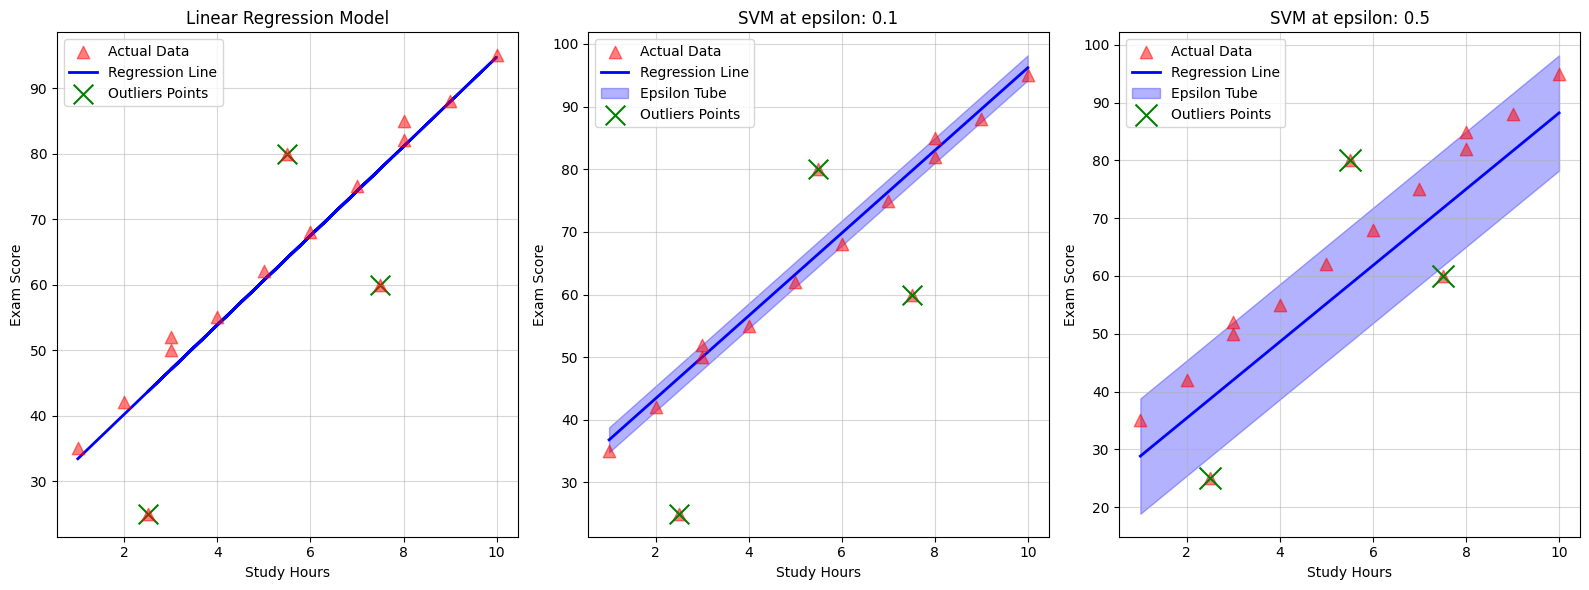

In [101]:
#visualization
fig, axes = plt.subplots(1,3,figsize=(16,6))

#linear model
axes[0].scatter(X,y,label='Actual Data',color='r',alpha=0.5,s=80,zorder=5,marker='^')
axes[0].plot(X,pred_y_ln,label='Regression Line',linewidth=2,color='blue')
axes[0].scatter(X[outliers_idx],y[outliers_idx],color='green',s=200,marker='x',label='Outliers Points')
axes[0].set_title(f'Linear Regression Model')
axes[0].set_ylabel('Exam Score')
axes[0].set_xlabel('Study Hours')
axes[0].grid(True,alpha=0.5)
axes[0].legend()

#svr with low eps
axes[1].scatter(X,y,label='Actual Data',color='r',alpha=0.5,s=80,zorder=5,marker='^')
axes[1].plot(X_line,y_line_pred,label='Regression Line',color='blue',linewidth=2)
axes[1].fill_between(X_line.ravel(),lower_y_l.ravel(),upper_y_l.ravel(),label='Epsilon Tube',color='blue',alpha=0.3)
axes[1].scatter(X[outliers_idx],y[outliers_idx],marker='x',color='green',s=200,zorder=6,label='Outliers Points')
axes[1].set_title(f'SVM at epsilon: {low_epsilon}')
axes[1].set_ylabel('Exam Score')
axes[1].set_xlabel('Study Hours')
axes[1].grid(True,alpha=0.5)
axes[1].legend()

# svr with high eps
axes[2].scatter(X,y,label='Actual Data',color='r',alpha=0.5,s=80,zorder=5,marker='^')
axes[2].plot(X_line,y_line_pred_h,color='blue',linewidth=2,label='Regression Line')
axes[2].fill_between(X_line.ravel(),lower_y_h.ravel(),upper_y_h.ravel(),label='Epsilon Tube',color='blue',alpha=0.3)
axes[2].scatter(X[outliers_idx],y[outliers_idx],label='Outliers Points',color='green',marker='x',zorder=6,s=250)
axes[2].set_title(f'SVM at epsilon: {high_epsilon}')
axes[2].set_ylabel('Exam Score')
axes[2].set_xlabel('Study Hours')
axes[2].grid(True,alpha=0.5)
axes[2].legend()
plt.tight_layout()
plt.show()
    